* log transform is one of the most commonly used mathematical transformations in feature engineering. Here are the benefits of using log transform:

    - Variance stabilizing. It helps to handle skewed data and after transformation, the distribution becomes more approximate to normal
    
    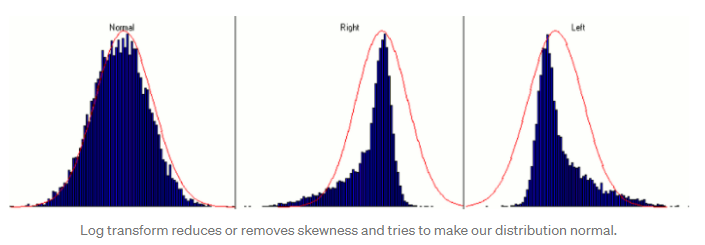
    
    - It also decreases the effect of the outliers due to the normalization of magnitude differences and the model become more robust because log transform reduces the range of values caused by outliers.
    - The data you apply log transform to <b>must have only positive values</b>, otherwise you receive an error

In [4]:
import pandas as pd
import numpy as np

data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})
data

,value
0,2
1,45
2,-23
3,85
4,28
5,2
6,35
7,-12


In [ ]:
data['log(x+1)'] = (data['value']+1).transform(np.log)
data

#### Negative Values Handling
$log(x-min(x)+1)$

In [ ]:
data['log(x-min(x)+1)'] = (data['value']-data['value'].min()+1) .transform(np.log)
data

### 6. One-Hot Encoding

* <b>The main idea behind this method is to changes categorical data to numerical data so that the data is easier for algorithm</b>
* One-hot encoding doesn't lose information. 
* This method spreads the values in a column to multiple flag columns and assigns 0 or 1 to them. 
* These binary values express the relationship between grouped and encoded column.


#### Example: One Hot encoding Applied to Color column
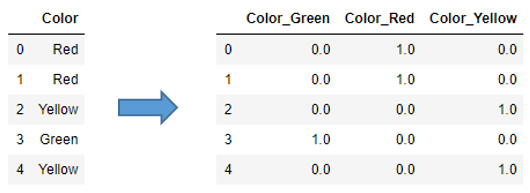

In [ ]:
color=pd.DataFrame({'Color': ['Red', 'Red', 'Yellow', 'Green', 'Yellow']})
color

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(color)
X_ohe = ohe.transform(color).toarray()
X_ohe

In [ ]:
ohe_df = pd.DataFrame(X_ohe, columns=ohe.get_feature_names_out(color.columns))
ohe_df

### 7. Aggregations / Group Statistics

* Create statistical features in a subgroup. These features may help ML algorithms a lot.
* For example, we want to create a new feature "salary_level" that indicates each person's salary level in the degree subgroup.

In [ ]:
salary=pd.DataFrame({'Name': ['David', 'Joe', 'Tom', 'Chris', 'Bob', 'Ed'], 
                     'Degree': ['BS', 'MS', 'BS', 'MS', 'MS', 'BS'], 
                     'Salary': [100, 120, 130, 140, 110, 90]})
salary

In [ ]:
degree_mean=salary.groupby('Degree').mean(numeric_only=True).rename(columns={'Salary':'Salary_mean_by_degree'})
degree_mean

In [ ]:
degree_std=salary.groupby('Degree').std(numeric_only=True).rename(columns={'Salary':'Salary_std_by_degree'})
degree_std

In [ ]:
salary=pd.merge(pd.merge(salary, degree_mean, on='Degree'), degree_std, on='Degree')
salary

In [ ]:
salary['Salary_level']=(salary['Salary']-salary['Salary_mean_by_degree'])/salary['Salary_std_by_degree']
salary

#### The above result shows that Tom is doing better in his subgroup than Chris, though Tom's salary is lower than Chris's.

### 8. Combining / Splitting

* Sometime string variable contain multiple information in one variable. 
* For example Newark, NJ 07102. You will need to split it with a regex or using a split method to get the city, the state, and the zip code

In [ ]:
schools=pd.DataFrame({'school': ['NJIT', 'Stevens'], 
                      'Address': ['Newark, NJ 07102', 'Hoboken, NJ 07030']})
schools

In [ ]:
schools[['City', 'State', 'Zip']] = schools['Address'].str.split(',?\s+', expand=True)
schools

### 9. Scaling

* Normalization
    - Normalization (or min-max normalization) scales all values in a fixed range between 0 and 1. This transformation does not change the distribution of the feature and due to the decreased standard deviations, the effects of the outliers increases. Therefore, before normalization, it is recommended to handle the outliers
    
    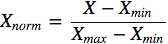
    
    
* Standardization (see 2. Handling Outliers)
    - Standardization (or z-score normalization) scales the values while taking into account standard deviation. If the standard deviation of features is different, their range also would differ from each other. This reduces the effect of the outliers in the features.

In [ ]:
data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})
data['normalized'] = (data['value'] - data['value'].min()) / (data['value'].max() - data['value'].min())
data

In [ ]:
data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})
data['standardized'] = (data['value'] - data['value'].mean()) / data['value'].std()
data

### 10. Extracting Date

* Extracting the parts of the date into different columns: Year, month, day, etc.
* Extracting the time period between the current date and columns in terms of years, months, days, etc.
* Extracting some specific features from the date: Name of the weekday, Weekend or not, holiday or not, etc.

In [9]:
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import math
import statsmodels.formula.api as sm
import statistics
IBM= pd.read_csv("data/IBM.csv") 
IBM

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,154.500000,154.809998,153.539993,154.250000,133.803574,4202500
1,2018-01-03,157.339996,159.809998,156.330002,158.490005,137.481537,9441600
2,2018-01-04,159.649994,162.320007,159.369995,161.699997,140.266037,7556200
3,2018-01-05,162.440002,162.899994,161.100006,162.490005,140.951324,5195800
4,2018-01-08,162.660004,163.910004,161.699997,163.470001,141.801422,5237500
...,...,...,...,...,...,...,...
245,2018-12-21,112.500000,115.279999,110.440002,110.940002,100.587357,10386500
246,2018-12-24,109.900002,111.000000,107.500000,107.570000,97.531830,3821400
247,2018-12-26,108.000000,111.389999,105.940002,111.389999,100.995361,6645800
248,2018-12-27,109.989998,113.779999,109.470001,113.779999,103.162338,6045600


In [ ]:
IBM.info()

In [ ]:
#Transform string to date
IBM['Date'] = pd.to_datetime(IBM.Date, format="%Y-%m-%d")
IBM

In [ ]:
IBM.info()

In [ ]:
from datetime import date

#Extracting Month
IBM['month'] = IBM['Date'].dt.month

#Extracting passed years since the date
IBM['passed_years'] = date.today().year - IBM['Date'].dt.year

IBM

### 6. Principal Component Analysis (PCA)

* The most popular technique when we think of dimension reduction
* The idea is to reduce the dimensionality of a dataset consisting of a large number of related variables while retaining as much variance in the data as possible, i.e., features are fewer but still can explain the variance of the target.

#### How does PCA work?

* PCA finds a set of new variables that the original variables are just their linear combinations. 
* The new variables are called Principal Components (PCs). 
* These principal components are orthogonal, i.e., they explain the variance from different angle. 

![pca1.png](pca1.png)

#### Use the iris dataset to illustrate PCA:


In [2]:
# Using Seaborn library to import Iris dataset
import seaborn as sns

iris = sns.load_dataset('iris')
print("Type", type(iris))

iris.head()

Type <class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### In PCA, we only use X variables. We don't use the target Y variable. In this case Y is species and X is the first 4 columns.

#### Standardization

* All the variables should be on the same scale before applying PCA, otherwise, a feature with large values will dominate the result. 
* Below use StandardScaler in scikit-learn to standardize the dataset’s features onto the unit scale (mean = 0 and variance = 1).

In [5]:
from sklearn.preprocessing import StandardScaler
variables = ['sepal_length','sepal_width','petal_length', 'petal_width']
x = iris.loc[:, variables].values
y = iris.loc[:,['species']].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


* There are four features in the original data. So PCA will provide the same number of principal components.
* Because PCA is the rotated coordinate system so it will have the same number principal components as original features

In [6]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923


#### How much variance does each of principal components explain?

In [7]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

* The first principal component accounts for 73% variance
* The second, third and fourth account for 23%, 3.7%, and 0.5% variance respectively.

### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components:

#### We can say 73 + 23 = 96% of the information is captured by the first and second principal components. 

* In order to reduce dimensionality, we keep only the significant features and drop the insignificant ones
* A rule of thumb is to keep the top principal components that capture significant variance and ignore the small ones.
* In this example, the 1st and 2nd are good enough to capture variance. The 3nd principal component is nice to include, but the 4th principal component is safe to drop.

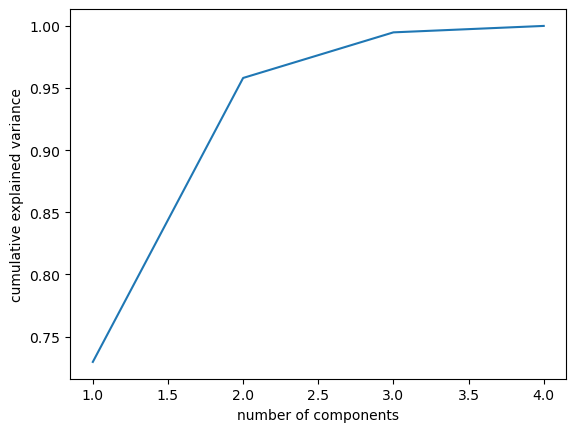

In [10]:
np.cumsum(pca.explained_variance_ratio_)
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#### Let's use only the 1st and 2nd principal components and plot the results. 

In [11]:
x_pca['target']=y
x_pca.columns = ['PC1','PC2','PC3','PC4','target']
x_pca.head()

,PC1,PC2,PC3,PC4,target
0,-2.264703,0.480027,-0.127706,-0.024168,setosa
1,-2.080961,-0.674134,-0.234609,-0.103007,setosa
2,-2.364229,-0.341908,0.044201,-0.028377,setosa
3,-2.299384,-0.597395,0.091290,0.065956,setosa
4,-2.389842,0.646835,0.015738,0.035923,setosa


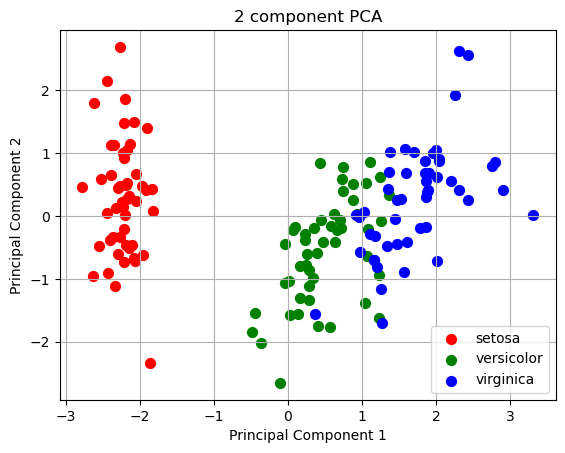

In [12]:
import matplotlib.pyplot as plt
#hacemos que nuestro dta sea en 2dimensiones

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ['setosa','versicolor','virginica']
colors = ['r','g','b']
for target, color in zip(targets,colors):
     indicesToKeep = x_pca['target'] == target
     ax.scatter(x_pca.loc[indicesToKeep,'PC1']
         ,x_pca.loc[indicesToKeep,'PC2']
         ,c = color
         ,s = 50)
ax.legend(targets)
ax.grid()

* PCA Pros

    * PCA is a linear method. 
    * It can only be applied to datasets which are linearly separable. 
    * It does an excellent job for datasets, which are linearly separable.
    
* PCA Cons

    * Might get a result which may not be the optimal dimensionality reduction on non-linear datasets


#### PCA Summary

* Start with PCA on high-dimensional dataset
    * Visualize the relationship between points
    * Understand the main variance in the data
    * Understand the intrinsic dimensionality
    * A straightforward and efficient path to gaining insight into high-dimensional data.

* PCA's main weakness
    * Highly affected by outliers in the data.
    * For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components.
    * Scikit-Learn contains a couple interesting variants on PCA, including ``RandomizedPCA`` and ``SparsePCA``, both also in the ``sklearn.decomposition`` submodule.


Reference:

https://towardsdatascience.com/anomaly-detection-for-dummies-15f148e559c1

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114

https://towardsdatascience.com/implementing-moving-averages-in-python-1ad28e636f9d

https://tcoil.info/savitzky-golay-filter-for-stocks-and-time-series-savgol-fit/

https://tmramalho.github.io/blog/2013/04/05/an-introduction-to-smoothing-time-series-in-python-part-i-filtering-theory/

https://towardsdatascience.com/time-series-smoothing-for-better-forecasting-7fbf10428b2

https://towardsdatascience.com/feature-engineering-deep-dive-into-encoding-and-binning-techniques-5618d55a6b38

https://dfrieds.com/data-analysis/bin-values-python-pandas.html

https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b

https://medium.com/analytics-vidhya/log-transform-for-positivity-d3e1f183c804